In [7]:
import networkx.algorithms.isomorphism as iso
import networkx as nx
import pandas as pd
import numpy as np

In [8]:
def load_graph(file):
    data = file.values
    G = nx.Graph()
    
    for i in range(len(data)):
        G.add_edge(data[i,0], data[i,1])
    return G

In [9]:
def load_labels(graph):
    for x in graph.nodes:
        graph.nodes[x]['label']=x

In [10]:
dppin=pd.read_csv('../Data/dppintarrasov.txt', names=['src', 'trg', 'time', 'exp'])

In [11]:
Gdppin = load_graph(dppin)

In [12]:
load_labels(Gdppin)

In [14]:
import signal
import time

def timeout_handler(num, stack):
    print("Received SIGALRM")
    raise Exception("FOREVER")

signal.signal(signal.SIGALRM, timeout_handler)

#need to iterate over all nodes in the graph, remove all matches to node each
def check_iso3(G):
    iso_groups={}
    set_to_check = set(G.nodes)
    print('nodes in set: ', len(set_to_check))
    for node1 in G.nodes:
        try:
            signal.alarm(3600)
            #signal.alarm(3)
            sub = nx.ego_graph(G, node1, radius = 3, undirected=True)
                #print(G.nodes[node1]['label'])
            print(node1)
            for node2 in G.nodes:
                #print(G.nodes[node2]['label'])
                if node2 in set_to_check:
                    sub2 = nx.ego_graph(G, node2, radius = 3, undirected=True)
                    if nx.is_isomorphic(sub, sub2):
                        if G.nodes[node1]['label'] not in iso_groups:
                            iso_groups[G.nodes[node1]['label']]=set()
                            #print("iso_groups after add: ", iso_groups)
                        iso_groups[G.nodes[node1]['label']].add(G.nodes[node2]['label'])
                        set_to_check.remove(node2)
                    #print("checked a single isomorphism!")
            signal.alarm(0)
        except Exception as ex:
            print("Too Long! Going to 2-hop neighborhood")
            sub = nx.ego_graph(G, node1, radius = 2, undirected=False)
            #print(G.nodes[node1]['label'])
            print(node1)
            for node2 in G.nodes:
                #print(G.nodes[node2]['label'])
                if node2 in set_to_check:
                    sub2 = nx.ego_graph(G, node2, radius = 2, undirected=False)
                    if nx.is_isomorphic(sub, sub2):
                        if G.nodes[node1]['label'] not in iso_groups:
                            iso_groups[G.nodes[node1]['label']]=set()
                            #print("iso_groups after add: ", iso_groups)
                        iso_groups[G.nodes[node1]['label']].add(G.nodes[node2]['label'])
                        set_to_check.remove(node2)
        finally:
            print('Back to 3-hop!')
        print("iso groups size : ", node1, len(iso_groups))
        print("nodes left in set: ", len(set_to_check))
                        
                    
    return iso_groups

In [15]:
import time
start = time.time()
isos = check_iso3(Gdppin)
end = time.time()
total=end-start

nodes in set:  905
14.0
Back to 3-hop!
iso groups size :  14.0 1
nodes left in set:  791
600.0
Back to 3-hop!
iso groups size :  600.0 1
nodes left in set:  791
22.0
Back to 3-hop!
iso groups size :  22.0 2
nodes left in set:  790
465.0
Back to 3-hop!
iso groups size :  465.0 3
nodes left in set:  789
651.0
Received SIGALRM
Too Long! Going to 2-hop neighborhood
651.0
Back to 3-hop!
iso groups size :  651.0 4
nodes left in set:  788
28.0
Back to 3-hop!
iso groups size :  28.0 5
nodes left in set:  785
211.0
Back to 3-hop!
iso groups size :  211.0 6
nodes left in set:  784
41.0
Back to 3-hop!
iso groups size :  41.0 7
nodes left in set:  783
695.0
Back to 3-hop!
iso groups size :  695.0 8
nodes left in set:  782
42.0
Back to 3-hop!
iso groups size :  42.0 9
nodes left in set:  781
579.0
Back to 3-hop!
iso groups size :  579.0 10
nodes left in set:  780
43.0
Back to 3-hop!
iso groups size :  43.0 11
nodes left in set:  779
425.0
Back to 3-hop!
iso groups size :  425.0 12
nodes left in set

Back to 3-hop!
iso groups size :  552.0 91
nodes left in set:  659
570.0
Back to 3-hop!
iso groups size :  570.0 92
nodes left in set:  658
632.0
Back to 3-hop!
iso groups size :  632.0 93
nodes left in set:  657
775.0
Back to 3-hop!
iso groups size :  775.0 94
nodes left in set:  656
810.0
Back to 3-hop!
iso groups size :  810.0 95
nodes left in set:  655
665.0
Back to 3-hop!
iso groups size :  665.0 96
nodes left in set:  654
667.0
Back to 3-hop!
iso groups size :  667.0 97
nodes left in set:  653
677.0
Back to 3-hop!
iso groups size :  677.0 97
nodes left in set:  653
872.0
Back to 3-hop!
iso groups size :  872.0 98
nodes left in set:  652
730.0
Back to 3-hop!
iso groups size :  730.0 99
nodes left in set:  651
954.0
Back to 3-hop!
iso groups size :  954.0 99
nodes left in set:  651
960.0
Back to 3-hop!
iso groups size :  960.0 99
nodes left in set:  651
1014.0
Back to 3-hop!
iso groups size :  1014.0 100
nodes left in set:  650
739.0
Back to 3-hop!
iso groups size :  739.0 101
node

Back to 3-hop!
iso groups size :  214.0 177
nodes left in set:  498
230.0
Back to 3-hop!
iso groups size :  230.0 178
nodes left in set:  495
243.0
Back to 3-hop!
iso groups size :  243.0 179
nodes left in set:  494
910.0
Back to 3-hop!
iso groups size :  910.0 180
nodes left in set:  493
261.0
Back to 3-hop!
iso groups size :  261.0 180
nodes left in set:  493
630.0
Back to 3-hop!
iso groups size :  630.0 180
nodes left in set:  493
276.0
Back to 3-hop!
iso groups size :  276.0 181
nodes left in set:  492
278.0
Back to 3-hop!
iso groups size :  278.0 181
nodes left in set:  492
625.0
Back to 3-hop!
iso groups size :  625.0 181
nodes left in set:  492
297.0
Back to 3-hop!
iso groups size :  297.0 182
nodes left in set:  486
467.0
Back to 3-hop!
iso groups size :  467.0 182
nodes left in set:  486
808.0
Back to 3-hop!
iso groups size :  808.0 182
nodes left in set:  486
959.0
Back to 3-hop!
iso groups size :  959.0 182
nodes left in set:  486
338.0
Back to 3-hop!
iso groups size :  338.

Back to 3-hop!
iso groups size :  938.0 239
nodes left in set:  399
645.0
Back to 3-hop!
iso groups size :  645.0 240
nodes left in set:  398
700.0
Received SIGALRM
Too Long! Going to 2-hop neighborhood
700.0
Back to 3-hop!
iso groups size :  700.0 241
nodes left in set:  397
788.0
Back to 3-hop!
iso groups size :  788.0 242
nodes left in set:  396
725.0
Back to 3-hop!
iso groups size :  725.0 242
nodes left in set:  396
1044.0
Back to 3-hop!
iso groups size :  1044.0 242
nodes left in set:  396
32.0
Back to 3-hop!
iso groups size :  32.0 243
nodes left in set:  395
383.0
Received SIGALRM
Too Long! Going to 2-hop neighborhood
383.0
Back to 3-hop!
iso groups size :  383.0 244
nodes left in set:  394
47.0
Back to 3-hop!
iso groups size :  47.0 245
nodes left in set:  393
198.0
Back to 3-hop!
iso groups size :  198.0 246
nodes left in set:  392
70.0
Back to 3-hop!
iso groups size :  70.0 247
nodes left in set:  391
88.0
Back to 3-hop!
iso groups size :  88.0 247
nodes left in set:  391
30

Back to 3-hop!
iso groups size :  97.0 313
nodes left in set:  296
538.0
Back to 3-hop!
iso groups size :  538.0 313
nodes left in set:  296
119.0
Back to 3-hop!
iso groups size :  119.0 314
nodes left in set:  294
565.0
Back to 3-hop!
iso groups size :  565.0 315
nodes left in set:  293
1019.0
Back to 3-hop!
iso groups size :  1019.0 316
nodes left in set:  292
227.0
Back to 3-hop!
iso groups size :  227.0 316
nodes left in set:  292
795.0
Back to 3-hop!
iso groups size :  795.0 316
nodes left in set:  292
237.0
Back to 3-hop!
iso groups size :  237.0 316
nodes left in set:  292
768.0
Back to 3-hop!
iso groups size :  768.0 316
nodes left in set:  292
273.0
Back to 3-hop!
iso groups size :  273.0 317
nodes left in set:  290
583.0
Back to 3-hop!
iso groups size :  583.0 318
nodes left in set:  289
647.0
Back to 3-hop!
iso groups size :  647.0 318
nodes left in set:  289
396.0
Back to 3-hop!
iso groups size :  396.0 319
nodes left in set:  287
471.0
Back to 3-hop!
iso groups size :  471

Back to 3-hop!
iso groups size :  921.0 378
nodes left in set:  200
78.0
Back to 3-hop!
iso groups size :  78.0 379
nodes left in set:  199
79.0
Back to 3-hop!
iso groups size :  79.0 379
nodes left in set:  199
85.0
Back to 3-hop!
iso groups size :  85.0 379
nodes left in set:  199
947.0
Back to 3-hop!
iso groups size :  947.0 380
nodes left in set:  197
83.0
Back to 3-hop!
iso groups size :  83.0 381
nodes left in set:  196
84.0
Back to 3-hop!
iso groups size :  84.0 381
nodes left in set:  196
87.0
Back to 3-hop!
iso groups size :  87.0 382
nodes left in set:  194
443.0
Back to 3-hop!
iso groups size :  443.0 383
nodes left in set:  193
102.0
Back to 3-hop!
iso groups size :  102.0 384
nodes left in set:  191
108.0
Back to 3-hop!
iso groups size :  108.0 385
nodes left in set:  190
183.0
Back to 3-hop!
iso groups size :  183.0 386
nodes left in set:  189
196.0
Back to 3-hop!
iso groups size :  196.0 387
nodes left in set:  188
365.0
Back to 3-hop!
iso groups size :  365.0 388
nodes 

Back to 3-hop!
iso groups size :  952.0 449
nodes left in set:  113
424.0
Back to 3-hop!
iso groups size :  424.0 449
nodes left in set:  113
784.0
Back to 3-hop!
iso groups size :  784.0 449
nodes left in set:  113
426.0
Back to 3-hop!
iso groups size :  426.0 450
nodes left in set:  110
436.0
Back to 3-hop!
iso groups size :  436.0 450
nodes left in set:  110
672.0
Back to 3-hop!
iso groups size :  672.0 451
nodes left in set:  109
628.0
Back to 3-hop!
iso groups size :  628.0 451
nodes left in set:  109
753.0
Back to 3-hop!
iso groups size :  753.0 451
nodes left in set:  109
445.0
Back to 3-hop!
iso groups size :  445.0 451
nodes left in set:  109
698.0
Back to 3-hop!
iso groups size :  698.0 451
nodes left in set:  109
880.0
Back to 3-hop!
iso groups size :  880.0 451
nodes left in set:  109
454.0
Back to 3-hop!
iso groups size :  454.0 452
nodes left in set:  106
536.0
Back to 3-hop!
iso groups size :  536.0 452
nodes left in set:  106
654.0
Back to 3-hop!
iso groups size :  654.

Back to 3-hop!
iso groups size :  839.0 491
nodes left in set:  62
922.0
Back to 3-hop!
iso groups size :  922.0 491
nodes left in set:  62
13.0
Back to 3-hop!
iso groups size :  13.0 492
nodes left in set:  61
177.0
Back to 3-hop!
iso groups size :  177.0 493
nodes left in set:  60
180.0
Back to 3-hop!
iso groups size :  180.0 493
nodes left in set:  60
621.0
Back to 3-hop!
iso groups size :  621.0 493
nodes left in set:  60
867.0
Back to 3-hop!
iso groups size :  867.0 493
nodes left in set:  60
999.0
Back to 3-hop!
iso groups size :  999.0 493
nodes left in set:  60
948.0
Back to 3-hop!
iso groups size :  948.0 494
nodes left in set:  59
44.0
Back to 3-hop!
iso groups size :  44.0 495
nodes left in set:  57
82.0
Back to 3-hop!
iso groups size :  82.0 495
nodes left in set:  57
380.0
Back to 3-hop!
iso groups size :  380.0 495
nodes left in set:  57
113.0
Back to 3-hop!
iso groups size :  113.0 495
nodes left in set:  57
115.0
Back to 3-hop!
iso groups size :  115.0 495
nodes left in

Back to 3-hop!
iso groups size :  855.0 534
nodes left in set:  8
925.0
Back to 3-hop!
iso groups size :  925.0 534
nodes left in set:  8
495.0
Back to 3-hop!
iso groups size :  495.0 534
nodes left in set:  8
895.0
Back to 3-hop!
iso groups size :  895.0 535
nodes left in set:  7
349.0
Back to 3-hop!
iso groups size :  349.0 535
nodes left in set:  7
866.0
Back to 3-hop!
iso groups size :  866.0 535
nodes left in set:  7
834.0
Back to 3-hop!
iso groups size :  834.0 535
nodes left in set:  7
606.0
Back to 3-hop!
iso groups size :  606.0 535
nodes left in set:  7
31.0
Back to 3-hop!
iso groups size :  31.0 535
nodes left in set:  7
330.0
Back to 3-hop!
iso groups size :  330.0 536
nodes left in set:  6
371.0
Back to 3-hop!
iso groups size :  371.0 536
nodes left in set:  6
969.0
Back to 3-hop!
iso groups size :  969.0 536
nodes left in set:  6
1048.0
Back to 3-hop!
iso groups size :  1048.0 536
nodes left in set:  6
132.0
Back to 3-hop!
iso groups size :  132.0 536
nodes left in set:  

In [26]:
total

152594.90729284286

In [16]:
# Automorphism group sizes
counts=[]
for x in isos:
    counts.append(len(isos[x]))

In [17]:
# number of unique nodes
list(counts).count(1)

440

In [25]:
440/905

0.4861878453038674

In [18]:
# size of largest automorphic group
np.array(counts).max()

114

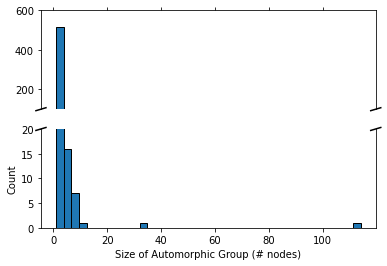

In [24]:
import matplotlib.pyplot as plt

f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.hist(counts, bins=40, edgecolor='black')
ax2.hist(counts, bins=40, edgecolor='black')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(100, 600)  
ax2.set_ylim(0, 20)  

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = .015  

kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


#ax.set_title('Distribution of Sizes of Automorphic Groups')
plt.xlabel('Size of Automorphic Group (# nodes)')
plt.ylabel('Count')
#plt.savefig('Dppindisttrue2.pdf', bbox_inches='tight')